## Common functions in OpenCV
Let us look at some of the most common image processing functions in the OpenCV library, along with their implementations. We'll be experimenting them with this picture of Waltuh.

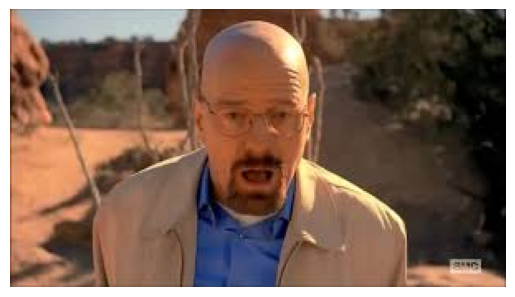

In [1]:
import cv2
import matplotlib.pyplot as plt

waltuh = cv2.cvtColor(cv2.imread(r"C:\Users\DELL\Downloads\images (3).jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(waltuh)
plt.axis("OFF")
plt.show()

### 1) _Gaussian blur_
Why do we need to blur an image? The reason is to cancel out the noise.

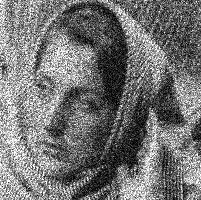
   
This can be done in many ways. We are only going to discuss Gaussian blurring, of course.
Let us define a **Gaussian distribution** before this. A Gaussian ditribution (or a _Normal distribution_) is given by the equation, $$\frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{(x-\mu)^2}{2\sigma^2})$$
where $\mu$ and $\sigma$ are the _mean_ and _standard deviation_ repectively.

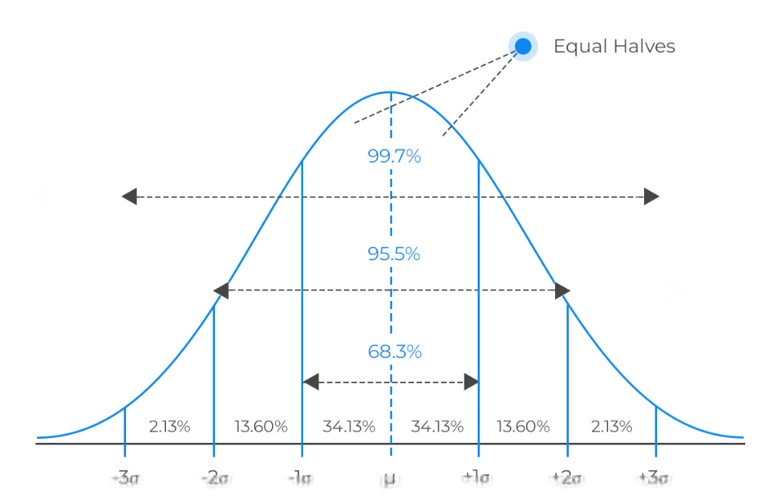

The 2-D analog is given by $$\frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{x^2+y^2}{2\sigma^2})$$
taking the mean to be the origin.

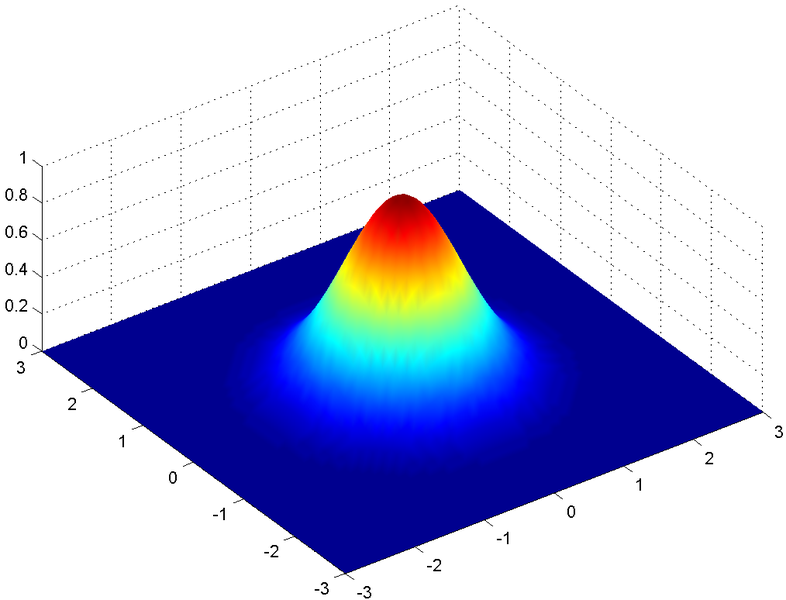

Now, this distribution can be imposed on a matrix, called the _kernel_ and is then convolved with the other pixels of the image. Two important features arise when we're talking about Gaussian blurs- the kernel size and the standard deviation. The kernel must be have an odd number of rows and columns, since the center of the matrix would determine the peak of the Gaussian. The standard deviation, then decides the values of the surrounding elements.

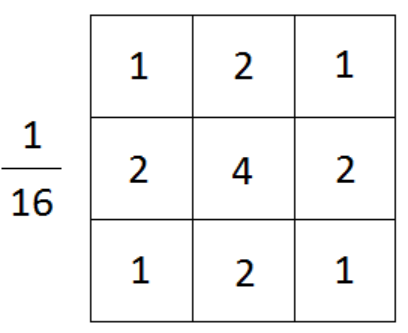

If the kernel size is increased, keeping $\sigma$ constant, then each pixel of the image is replaced by the weighted sum of more neighbouring pixels. Hence, the blur increases.

If $\sigma$ is increased, keeping the kernel size constant, then the neighbouring pixels have almost the same values and they contribute more, compared to the center pixel. Hence, the blur increases.

In [ ]:
blurred_waltuh_1 = cv2.GaussianBlur(waltuh, [3,3], 30)
blurred_waltuh_2 = cv2.GaussianBlur(waltuh, [11,11], 1)

figure = plt.figure(figsize = [20,20])

figure.add_subplot(1,3,1)
plt.imshow(waltuh)
plt.axis("OFF")
plt.title("Original")

figure.add_subplot(1,3,2)
plt.imshow(blurred_waltuh_1)
plt.axis("OFF")
plt.title("High standard deviation")

figure.add_subplot(1,3,3)
plt.imshow(blurred_waltuh_2)
plt.axis("OFF")
plt.title("Large kernel size")

plt.show()

### 2) Edge detection
An edge can be thought of as an abrupt change in intensity in a certain part of an image. This change could be found out by say, taking the derivative. Since an image isn't continuous and is made up of discrete pixels, we can apply a _Discrete Gradient operator_ on the pixels, along the x and y directions.

Now, to calculate the partial derivative along x direction at a pixel, we compute the difference between the next and previous pixels (in the x direction, of course). Mathematically, the filter is represented by $$\begin{bmatrix}-1&0&1\end{bmatrix}$$
It is important to note that we don't use $\begin{bmatrix}-1&1\end{bmatrix}$ as it would mean computing the difference between the intensities of two adjacent pixels. This is avoided as it calculates the gradient at the mid-point of the two pixels, which isn't really a pixel.

Similiarly, the partial derivative along y direction is represented by the operator $${\begin{bmatrix}-1&0&1\end{bmatrix}}^T$$
Generally, these operators aren't denoted by a single row or column. They are done so as square matrices. The reason is that with a single row or a column, there isn't much information in the operator. So, even if one pixel in the image is corrupted by noise, our filter won't be that accurate. However, on increasing the kernel size, the operator won't be localised enough. Thus, it would be also be affected by pixels much farther than the center one. The 3x3 operators are known as the **Prewitt operators**.

These gradients are then used to find the magnitude and orientation of the edges as follows $$\text{Magnitude }=\sqrt{{(\frac{\delta f}{\delta x})}^2 + {(\frac{\delta f}{\delta y})}^2}$$
$$\text{Direction along } tan^{-1}({\frac{\delta f}{\delta y}}/{\frac{\delta f}{\delta x}})$$
The **Sobel operator** is another similiar operator, which works on the principle of first derivatives.
$$\nabla_x = \begin{bmatrix}-1&0&1\\-2&0&2\\-1&0&1\end{bmatrix} \text{, and } \nabla_y = \begin{bmatrix}-1&-2&-1\\0&0&0\\1&2&1\end{bmatrix}$$
We can also try using the **Laplacian operator**, which deals with the second derivative of the pixel intensities.

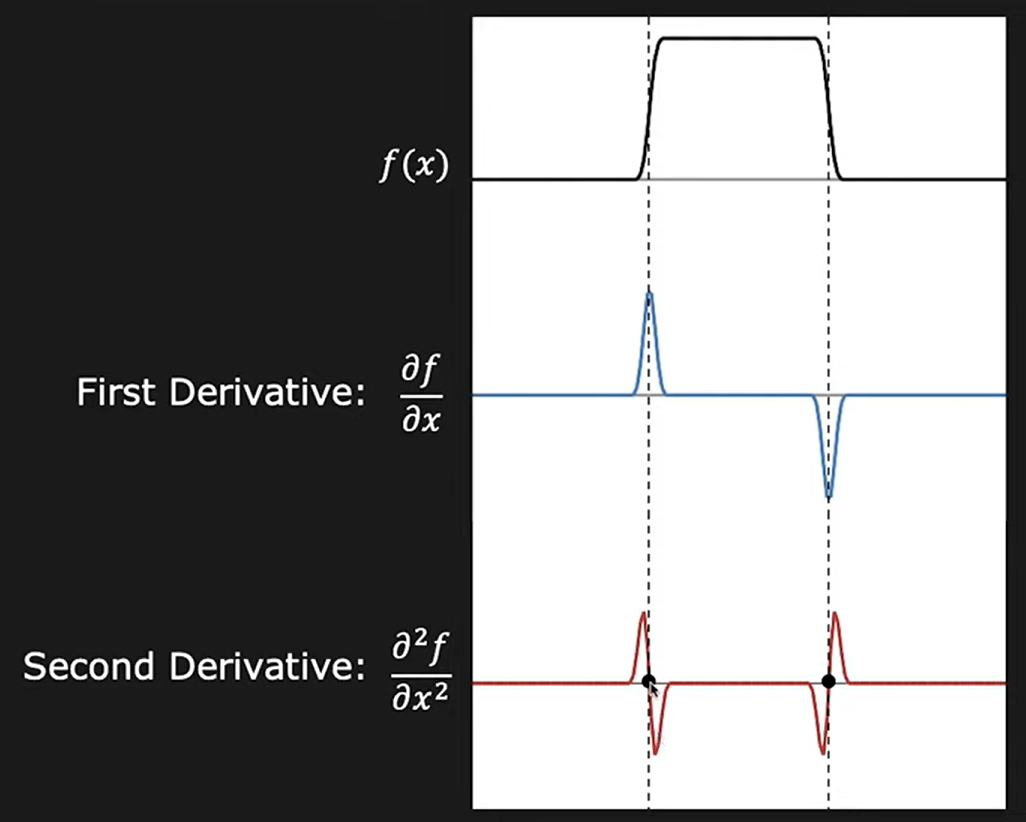

These zero-crossings indicate the edges. The Laplacian is represented by
$$\begin{align*}\nabla^2f &= \frac{\delta^2f}{\delta x^2} + \frac{\delta^2f}{\delta y^2}\\&=f(x+1,y)-f(x,y)-f(x,y)+f(x-1,y)+ f(x,y+1)-f(x,y)-f(x,y)+f(x,y-1)\\&=f(x+1,y)+f(x-1,y)+f(x,y+1)+f(x,y-1)-4f(x,y)\end{align*}$$
By taking the negative sign, $$\nabla^2 = \begin{bmatrix}0&-1&0\\-1&4&-1\\0&-1&0\end{bmatrix}$$
Note that the corners aren't considered to the contribution. So, this model isn't much accurate.

Therefore, we're going to use **Canny edge detection**, which combines the above approaches to dish out better results. At first, the gradient magnitudes and orientations are computed via the Sobel operator. Then, **non-maximum suppression** is carried out, where if a pixel's gradient magnitude is less than its neighbours, it is discarded as an edge. Lastly, double thresholds are used to classify edges as _strong_, _weak_ or _non-edges_, before hysteresis is done by checking whether any weak edge is adjacent to a strong edge or not. If so, then it becomes a real edge; or else, is discarded.

In [ ]:
grayscale_waltuh = cv2.cvtColor(waltuh, cv2.COLOR_RGB2GRAY)
edges_in_waltuh = cv2.Canny(grayscale_waltuh,75,100)

figure = plt.figure(figsize = [10,10])

figure.add_subplot(1,2,1)
plt.imshow(grayscale_waltuh, cmap = "gray")
plt.axis("OFF")
plt.title("Grayscale")

figure.add_subplot(1,2,2)
plt.imshow(edges_in_waltuh, cmap = "gray")
plt.axis("OFF")
plt.title("Edges")

plt.show()

### 3) Histogram equalisation
We can make a histogram plot of the frquency v/s intensity values for all the pixels of a particular colour channel. Thus, there would be only one plot for a grayscale image, and three different plot for an RGB image.

For us to extract sufficient information from an image, it must have a decent contrast. In other words, it must have a fair share of pixels for almost all the intensity values (ranging from 0 to 255). Now, for images having all the pixels clustered up in a particular region of intensities, we carry out the proccess of **histrogram equalisation**.

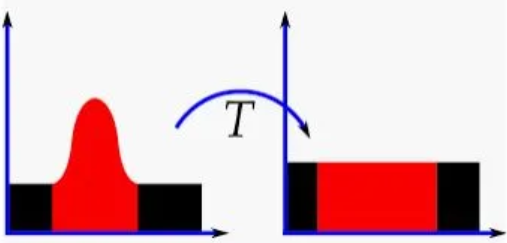

Here, these peaks are stretched out evenly over a wide range of intensities to introduce contrast.

In [ ]:
waltuh_with_contrast = cv2.equalizeHist(grayscale_waltuh)

figure = plt.figure(figsize = [10,10])

figure.add_subplot(1,2,1)
plt.imshow(grayscale_waltuh, cmap = "gray")
plt.axis("OFF")
plt.title("Grayscale")

figure.add_subplot(1,2,2)
plt.imshow(waltuh_with_contrast, cmap = "gray")
plt.axis("OFF")
plt.title("Contrast")

plt.show()

### 4) Thresholding
The idea is to convert a grayscale image to a binary image, having pixels with intensity values as either 0 or 255. If the intensity value of a pixel is above a particular threshold, then it is made white; or else, black.

In [ ]:
_, binary_waltuh = cv2.threshold(grayscale_waltuh, 80, 255, cv2.THRESH_BINARY)

figure = plt.figure(figsize = [10,10])

figure.add_subplot(1,2,1)
plt.imshow(grayscale_waltuh, cmap = "gray")
plt.axis("OFF")
plt.title("Grayscale")

figure.add_subplot(1,2,2)
plt.imshow(binary_waltuh, cmap = "gray")
plt.axis("OFF")
plt.title("Binary")

plt.show()

### 5) Morphological transformations
These are only concerned with the shape of the image, and are used to change it. Several examples include:

i) Dilation- Adding pixels along the boundary

ii) Erosion- Removing pixels along the boundary

iii) Opening- Erosion, followed by dilation

iv) Closing- Dilation, followed by erosion

In [ ]:
import numpy as np

dilated_waltuh = cv2.dilate(binary_waltuh, np.ones([2,2],np.uint8), iterations = 2)
eroded_waltuh = cv2.erode(binary_waltuh, np.ones([2,2],np.uint8), iterations = 2)
waltuh_opening = cv2.morphologyEx(binary_waltuh, cv2.MORPH_OPEN, np.ones([2,2],np.uint8))
waltuh_closing = cv2.morphologyEx(binary_waltuh, cv2.MORPH_CLOSE, np.ones([2,2],np.uint8))

figure = plt.figure(figsize = [20,10])

figure.add_subplot(2,3,1)
plt.imshow(grayscale_waltuh, cmap = "gray")
plt.axis("OFF")
plt.title("Grayscale")

figure.add_subplot(2,3,2)
plt.imshow(binary_waltuh, cmap = "gray")
plt.axis("OFF")
plt.title("Binary")

figure.add_subplot(2,3,3)
plt.imshow(dilated_waltuh, cmap = "gray")
plt.axis("OFF")
plt.title("Dilation")

figure.add_subplot(2,3,4)
plt.imshow(eroded_waltuh, cmap = "gray")
plt.axis("OFF")
plt.title("Erosion")

figure.add_subplot(2,3,5)
plt.imshow(waltuh_opening, cmap = "gray")
plt.axis("OFF")
plt.title("Opening")

figure.add_subplot(2,3,6)
plt.imshow(waltuh_closing, cmap = "gray")
plt.axis("OFF")
plt.title("Closing")

plt.show()

### 6) Affine transformations
These include elementary transformations, like translation, rotation, shearing and other transformations which preserve line parallelism, i.e. two parallel lines remain parallel after the transformation. In a 2-D space (like an image), any point can be transformed as $$x' = Ax$$ where $x$ and $x'$ are 2x1 vectors, representing the coordinates of the point before and after the transformation respectively, and $A$ is the 2x2 transformation matrix.

Translation, however, is a special case as it can't be represented by the above equation. Hence, we modify the equation as $$x' = Ax + b$$ where $b$ is a 2x1 vector representing the translation along the x and y directions.

For example, a shear along x axis can be represented by 
$$\begin{bmatrix}x'\\y'\end{bmatrix}=\begin{bmatrix}2&0\\0&1\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix}+\begin{bmatrix}0\\0\end{bmatrix}$$
However, this isn't a linear system due to the extra $b$ term. So, we use the idea of **Homogenous coordinates** and use a single 3x3 transformation matrix to represent it.
$$\begin{bmatrix}x'\\y'\\1\end{bmatrix}=\begin{bmatrix}2&0&0\\0&1&0\\0&0&1\end{bmatrix}\begin{bmatrix}x\\y\\1\end{bmatrix}$$
where we project the image onto the $z = 1$ plane.

By generalising this, $$\begin{bmatrix}x'\\y'\\1\end{bmatrix}=\begin{bmatrix}r_{11}&r_{12}&t_x\\r_{21}&r_{22}&t_y\\0&0&1\end{bmatrix}\begin{bmatrix}x\\y\\1\end{bmatrix}$$
The last row is always like that in all affine transformation matrices as they are concerned with transformations about the z-axis.

In [ ]:
import math
x = 1/math.sqrt(2)
rotation = np.array([[x,-x,0],[x,x,0]], dtype = np.float32)
shear = np.array([[0.5,0,0],[0,0.75,0]], dtype = np.float32)
translation = np.array([[1,0,100],[0,1,-50]], dtype = np.float32)
r,c,_= waltuh.shape
rotated_waltuh = cv2.warpAffine(waltuh,rotation,[c,r])
sheared_waltuh = cv2.warpAffine(waltuh,shear,[c,r])
translated_waltuh = cv2.warpAffine(waltuh,translation,[c,r])

figure = plt.figure(figsize = [20,10])

figure.add_subplot(1,3,1)
plt.imshow(rotated_waltuh)
plt.axis("OFF")
plt.title("Rotation")

figure.add_subplot(1,3,2)
plt.imshow(sheared_waltuh)
plt.axis("OFF")
plt.title("Shear")

figure.add_subplot(1,3,3)
plt.imshow(translated_waltuh)
plt.axis("OFF")
plt.title("Translation")

plt.show()